In [687]:
import torch
#from torch import nn, optim
from torchvision import datasets
#from torchvision.transforms import Compose, ToTensor,Normalize
import numpy as np
import scipy.io as sio
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from glob import glob
import nibabel as nb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch, torchvision
import torch.nn as nn 
import torch.nn.functional as F
import torchvision.transforms as transforms 

from time import time
import os
import copy
#os.environ['CUDA_VISIBLE_DEVICES'] = '2'

from tqdm import tqdm
import pdb

# Importing datasets

In [2]:
from zipfile import ZipFile
  
# specifying the zip file name
file_name1 = "/workspace/ID1000.zip"

In [3]:
#with ZipFile(file_name1, 'r') as zip:
    #printing all the contents of the zip file
    #zip.printdir()
    #extracting all the files
    #print('Extracting all the files now...')
    #zip.extractall()
    #print('Done!')


In [777]:
#base_data_dir = ['/workspace/PIOP1','/workspace/PIOP2','/workspace/ID1000']
base_data_dir = '/workspace/PIOP1'
base_data_dir2 = '/workspace/PIOP2'
base_data_dir3 = '/workspace/ID1000'
base_data_dir_run2 = '/workspace/ID1000_run2'
base_data_dir_run3 = '/workspace/ID1000_run3'
imageid_path_dict0 = {os.path.splitext(os.path.splitext(os.path.basename(x))[0])[0]: x
                     for x in glob(os.path.join(base_data_dir, '*.nii.gz'))}
imageid_path_dict1 = {os.path.splitext(os.path.splitext(os.path.basename(x))[0])[0]: x
                     for x in glob(os.path.join(base_data_dir2, '*.nii.gz'))}
imageid_path_dict2 = {os.path.splitext(os.path.splitext(os.path.basename(x))[0])[0]: x
                     for x in glob(os.path.join(base_data_dir3, '*.nii.gz'))}
imageid_path_dict_run2 = {os.path.splitext(os.path.splitext(os.path.basename(x))[0])[0]: x
                     for x in glob(os.path.join(base_data_dir_run2, '*.nii.gz'))}
imageid_path_dict_run3 = {os.path.splitext(os.path.splitext(os.path.basename(x))[0])[0]: x
                     for x in glob(os.path.join(base_data_dir_run3, '*.nii.gz'))}
#imageid_path_dict0.update(imageid_path_dict1)
#imageid_path_dict0.update(imageid_path_dict2)
print('PIOP1:', len(imageid_path_dict0))
print('PIOP2:', len(imageid_path_dict1))
print('ID1000:', len(imageid_path_dict2))
print('ID1000_run2:', len(imageid_path_dict_run2))
print('ID1000_run3:', len(imageid_path_dict_run3))

PIOP1: 214
PIOP2: 227
ID1000: 917
ID1000_run2: 30
ID1000_run3: 20


(-0.5, 181.5, 217.5, -0.5)

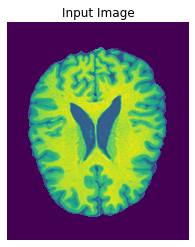

In [779]:
import matplotlib.pyplot as plt
im = nb.load('/workspace/ID1000_run3/sub-0799_run-3_T1w.nii.gz')
im = im.get_fdata()
plt.imshow(im[:, :, im.shape[2] // 2].T)
plt.title('Input Image')
plt.axis('off')

In [781]:
#base_data_dir = '/workspace/Dataset'
base_data_dir = '/workspace'

In [782]:
df_PIOP1 = pd.read_csv(os.path.join(base_data_dir,'PIOP1.tsv'), sep='\t', header=0)
df_PIOP2 = pd.read_csv(os.path.join(base_data_dir,'PIOP2.tsv'), sep='\t', header=0)
df_ID1000 = pd.read_csv(os.path.join(base_data_dir,'ID1000.tsv'), sep='\t', header=0)
df_ID1000_run2 = pd.read_csv(os.path.join(base_data_dir,'ID1000.tsv'), sep='\t', header=0)
df_ID1000_run3 = pd.read_csv(os.path.join(base_data_dir,'ID1000.tsv'), sep='\t', header=0)
df_PIOP1['path'] = (df_PIOP1['participant_id']+'_T1w').map(imageid_path_dict0.get)
df_PIOP2['path'] = (df_PIOP2['participant_id']+'_T1w').map(imageid_path_dict1.get)
df_ID1000['path'] = (df_ID1000['participant_id']+'_run-1_T1w').map(imageid_path_dict2.get)
df_ID1000_run2['path'] = (df_ID1000_run2['participant_id']+'_run-2_T1w').map(imageid_path_dict_run2.get)
df_ID1000_run3['path'] = (df_ID1000_run3['participant_id']+'_run-3_T1w').map(imageid_path_dict_run3.get)
df_ID1000_run2['path']

0      None
1      None
2      None
3      None
4      None
       ... 
923    None
924    None
925    None
926    None
927    None
Name: path, Length: 928, dtype: object

In [789]:
for i in range(len(df_ID1000_run2)):
    if df_ID1000_run2['path'][i] == None:
        df_ID1000_run2['path'][i] = 'Nopath'
df_ID1000_run2['path']
for i in range(len(df_ID1000_run3)):
    if df_ID1000_run3['path'][i] == None:
        df_ID1000_run3['path'][i] = 'Nopath'
df_ID1000_run3['path']

<ipython-input-789-de3f21368850>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ID1000_run3['path'][i] = 'Nopath'


0      Nopath
1      Nopath
2      Nopath
3      Nopath
4      Nopath
        ...  
923    Nopath
924    Nopath
925    Nopath
926    Nopath
927    Nopath
Name: path, Length: 928, dtype: object

In [790]:
df_ID1000_run2 = df_ID1000_run2[df_ID1000_run2['path'] != 'Nopath']
len(df_ID1000_run2)
df_ID1000_run2 = df_ID1000_run2.reset_index(drop=True)
df_ID1000_run3 = df_ID1000_run3[df_ID1000_run3['path'] != 'Nopath']
df_ID1000_run3 = df_ID1000_run3.reset_index(drop=True)

In [370]:
#Removing ambidextrous group, considering only right and left handed people
df_PIOP1 = df_PIOP1[df_PIOP1['handedness']!='ambidextrous']
df_PIOP2 = df_PIOP2[df_PIOP2['handedness']!='ambidextrous']
df_ID1000 = df_ID1000[df_ID1000['handedness']!='ambidextrous']

In [372]:
df_PIOP1['hand_type_idx'] = pd.Categorical(df_PIOP1['handedness']).codes
df_PIOP2['hand_type_idx'] = pd.Categorical(df_PIOP2['handedness']).codes
df_ID1000['hand_type_idx'] = pd.Categorical(df_ID1000['handedness']).codes

df_PIOP1['gender_type_idx'] = pd.Categorical(df_PIOP1['sex']).codes
df_PIOP2['gender_type_idx'] = pd.Categorical(df_PIOP2['sex']).codes
df_ID1000['gender_type_idx'] = pd.Categorical(df_ID1000['sex']).codes
df_PIOP1['sex'].value_counts()

F    118
M     86
Name: sex, dtype: int64

In [376]:
df_PIOP1 = df_PIOP1[df_PIOP1['gender_type_idx'] != -1]
df_PIOP1['gender_type_idx'].value_counts()

0    118
1     86
Name: gender_type_idx, dtype: int64

In [377]:
from sklearn.model_selection import train_test_split
y = df_PIOP1['sex']
df_PIOP1_train,df_PIOP1_test = train_test_split(df_PIOP1, test_size=0.3, random_state=42, stratify=y)
df_PIOP1_train = df_PIOP1_train.reset_index(drop=True)
df_PIOP1_test = df_PIOP1_test.reset_index(drop=True)

#y = df_PIOP2['hand_type_idx']
df_PIOP2_train,df_PIOP2_test = train_test_split(df_PIOP2, test_size=0.2, random_state=42)#stratify=y
df_PIOP2_train = df_PIOP2_train.reset_index(drop=True)
df_PIOP2_test = df_PIOP2_test.reset_index(drop=True)

y = df_ID1000['gender_type_idx']
df_ID1000_train,df_ID1000_test = train_test_split(df_ID1000, test_size=0.2, random_state=42, stratify=y)
df_ID1000_train = df_ID1000_train.reset_index(drop=True)
df_ID1000_test = df_ID1000_test.reset_index(drop=True)

# Data balance

In [12]:
weight1 = np.ceil(max(df_PIOP1_train['handedness'].value_counts())/df_PIOP1_train['handedness'].value_counts())

weight2 = np.ceil(max(df_PIOP2_train['handedness'].value_counts())/df_PIOP2_train['handedness'].value_counts())
#weight3 = np.ceil(max(df_ID1000['handedness'].value_counts())/df_ID1000['handedness'].value_counts())
#print('Weight1:\n', weight1, '\nWeight2:\n', weight2, 'Weight3:\n', weight3)
print('Weight1:\n', weight1,'\nWeight2:\n', weight2,)

Weight1:
 right    1.0
left     8.0
Name: handedness, dtype: float64 
Weight2:
 right     1.0
left     11.0
Name: handedness, dtype: float64


In [13]:
#Duplicate some columns to make them balanced 
# Duplicate fewer class to balance through all classes
data_aug_rate1 = [8,1]
data_aug_rate2 = [9,1]
for i in range(2):
    if data_aug_rate1[i]:
        df_PIOP1_train=df_PIOP1_train.append([df_PIOP1_train.loc[df_PIOP1_train['hand_type_idx'] == i,:]]*(data_aug_rate1[i]-1), ignore_index=True)
    if data_aug_rate2[i]:
        df_PIOP2_train=df_PIOP2_train.append([df_PIOP2_train.loc[df_PIOP2_train['hand_type_idx'] == i,:]]*(data_aug_rate2[i]-1), ignore_index=True)        
print(df_PIOP1_train['handedness'].value_counts())
print(df_PIOP2_train['handedness'].value_counts())

left     136
right    125
Name: handedness, dtype: int64
right    163
left     135
Name: handedness, dtype: int64


In [381]:
df_PIOP1_train = df_PIOP1_train.reset_index(drop=True)
df_PIOP1_test = df_PIOP1_test.reset_index(drop=True)

(-0.5, 181.5, 217.5, -0.5)

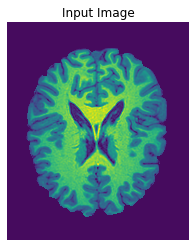

In [382]:
import matplotlib.pyplot as plt
im = nb.load(df_PIOP1_train['path'][10])
im = im.get_fdata()
plt.imshow(im[:, :, im.shape[2] // 2].T)
plt.title('Input Image')
plt.axis('off')

In [386]:
df_PIOP2_train1 = df_PIOP2_train1.reset_index(drop=True)
df_PIOP2_test = df_PIOP2_test.reset_index(drop=True)
df_PIOP1_train1 = df_PIOP1_train1.reset_index(drop=True)
df_PIOP1_test = df_PIOP1_test.reset_index(drop=True)
df_PIOP1_train1['sex'].value_counts()

F    159
M     93
Name: sex, dtype: int64

# Data Loading

In [518]:
# Define a pytorch dataloader for this dataset
class ADNI_Dataset_hand(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images_list = [nb.load(image_path) for image_path in df['path']]
     
        #print(self.images.shape)
        #print(self.targets.shape)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load data and get label
        Xa = self.images_list[index]
        Xa = np.asarray(Xa.dataobj)
        #Xa = np.array(Xa.dataobj)
        Ya = torch.tensor(int(self.df['hand_type_idx'][index]))
        Ya = np.array(Ya)
        #Xa = Xa.reshape()
        #print('Type:',type(Xa), 'Shape:', Xa[0].shape)
        Xa = Xa.astype('float32')
        Xa /= 255                         #normalized to [0,1.0]
        Xa = np.expand_dims(Xa, axis = 1) #add channel=1 to the data, n * c * H * W
        Ya = Ya.astype('int64')
        
        X = torch.from_numpy(Xa)
        #print(X.shape)
        X = X.permute(1, 0, 2, 3)
        y = torch.from_numpy(Ya)
        if self.transform:
            X = self.transform(X)
        return X, y

In [519]:
# Define a pytorch dataloader for this dataset
class ADNI_Dataset_sex(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.images_list = [nb.load(image_path) for image_path in df['path']]
     
        #print(self.images.shape)
        #print(self.targets.shape)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load data and get label
        Xa = self.images_list[index]
        Xa = np.asarray(Xa.dataobj)
        #Xa = np.array(Xa.dataobj)
        Ya = torch.tensor(int(self.df['gender_type_idx'][index]))
        Ya = np.array(Ya)
        #Xa = Xa.reshape()
        #print('Type:',type(Xa), 'Shape:', Xa[0].shape)
        Xa = Xa.astype('float32')
        Xa /= 255                         #normalized to [0,1.0]
        Xa = np.expand_dims(Xa, axis = 1) #add channel=1 to the data, n * c * H * W
        Ya = Ya.astype('int64')
        
        X = torch.from_numpy(Xa)
        #print(X.shape)
        X = X.permute(1, 0, 2, 3)
        y = torch.from_numpy(Ya)
        if self.transform:
            X = self.transform(X)
        return X, y


In [481]:
for i in range(len(df_ID1000_train)):
    if (df_ID1000_train['path'][i]  == None):
        df_ID1000_train['path'][i] = 'No_Image'
for i in range(len(df_ID1000_test)):
    if (df_ID1000_test['path'][i]  == None):
        df_ID1000_test['path'][i] = 'No_Image'
for i in range(len(df_PIOP1_train1)):
    if (df_PIOP1_train1['path'][i]  == None):
        df_PIOP1_train1['path'][i] = 'No_Image'
for i in range(len(df_PIOP1_test)):
    if (df_PIOP1_test['path'][i]  == None):
        df_PIOP1_test['path'][i] = 'No_Image'
df_ID1000_train = df_ID1000_train[df_ID1000_train['path'] != 'No_Image']
df_ID1000_train = df_ID1000_train.reset_index(drop=True)      

df_PIOP1_train1 = df_PIOP1_train1[df_PIOP1_train1['path'] != 'No_Image']
df_PIOP1_train1 = df_PIOP1_train1.reset_index(drop=True)  

df_PIOP1_test = df_PIOP1_test[df_PIOP1_test['path'] != 'No_Image']
df_PIOP1_test = df_PIOP1_test.reset_index(drop=True)  

df_ID1000_test = df_ID1000_test[df_ID1000_test['path'] != 'No_Image']
df_ID1000_test = df_ID1000_test.reset_index(drop=True)   

In [349]:
df_PIOP1_train1['gender_type_idx'] = pd.Categorical(df_PIOP1_train1['sex']).codes
df_PIOP1_test['gender_type_idx'] = pd.Categorical(df_PIOP1_test['sex']).codes
df_PIOP2_train1['gender_type_idx'] = pd.Categorical(df_PIOP2_train1['sex']).codes
df_PIOP2_test['gender_type_idx'] = pd.Categorical(df_PIOP2_test['sex']).codes

In [791]:
df_ID1000_run2['gender_type_idx'] = pd.Categorical(df_ID1000_run2['sex']).codes
df_ID1000_run2['hand_type_idx'] = pd.Categorical(df_ID1000_run2['sex']).codes
df_ID1000_run3['gender_type_idx'] = pd.Categorical(df_ID1000_run3['sex']).codes
df_ID1000_run3['hand_type_idx'] = pd.Categorical(df_ID1000_run3['sex']).codes

In [888]:
train_data_PIOP1_sex = ADNI_Dataset_sex(df_PIOP1_train1)
test_data_PIOP1_sex = ADNI_Dataset_sex(df_PIOP1_test)
train_data_PIOP1_hand = ADNI_Dataset_hand(df_PIOP1_train1)
test_data_PIOP1_hand = ADNI_Dataset_hand(df_PIOP1_test)

train_data_PIOP2_sex = ADNI_Dataset_sex(df_PIOP2_train1)
test_data_PIOP2_sex = ADNI_Dataset_sex(df_PIOP2_test)
train_data_PIOP2_hand = ADNI_Dataset_hand(df_PIOP2_train1)
test_data_PIOP2_hand = ADNI_Dataset_hand(df_PIOP2_test)

train_data_ID_sex = ADNI_Dataset_sex(df_ID1000_train)
test_data_ID_sex = ADNI_Dataset_sex(df_ID1000_test)
train_data_ID_hand = ADNI_Dataset_hand(df_ID1000_train)
test_data_ID_hand = ADNI_Dataset_hand(df_ID1000_test)

trainloader_PIOP1_sex = DataLoader(train_data_PIOP1_sex, batch_size=3, shuffle=True)
testloader_PIOP1_sex = DataLoader(test_data_PIOP1_sex, batch_size=3, shuffle=False)
trainloader_PIOP1_hand = DataLoader(train_data_PIOP1_hand, batch_size=3, shuffle=True)
testloader_PIOP1_hand = DataLoader(test_data_PIOP1_hand, batch_size=3, shuffle=False)

trainloader_PIOP2_sex = DataLoader(train_data_PIOP2_sex, batch_size=3, shuffle=True)
testloader_PIOP2_sex = DataLoader(test_data_PIOP2_sex, batch_size=3, shuffle=False)
trainloader_PIOP2_hand = DataLoader(train_data_PIOP2_hand, batch_size=3, shuffle=True)
testloader_PIOP2_hand = DataLoader(test_data_PIOP2_hand, batch_size=3, shuffle=False)

trainloader_ID_sex = DataLoader(train_data_ID_sex, batch_size=3, shuffle=True)
testloader_ID_sex = DataLoader(test_data_ID_sex, batch_size=3, shuffle=False)
trainloader_ID_hand = DataLoader(train_data_ID_hand, batch_size=3, shuffle=True)
testloader_ID_hand = DataLoader(test_data_ID_hand, batch_size=3, shuffle=False)
#trainloader = DataLoader(train_data_ID, batch_size=3, shuffle=True)
#testloader = DataLoader(test_data_ID, batch_size=3, shuffle=False)

In [792]:
train_ID_run_2_sex = ADNI_Dataset_sex(df_ID1000_run2)
train_ID_run_2_hand = ADNI_Dataset_hand(df_ID1000_run2)
trainloader_ID_run_2_sex = DataLoader(train_ID_run_2_sex, batch_size=3, shuffle=True)
trainloader_ID_run_2_hand = DataLoader(train_ID_run_2_hand, batch_size=3, shuffle=True)
train_ID_run_3_sex = ADNI_Dataset_sex(df_ID1000_run3)
train_ID_run_3_hand = ADNI_Dataset_hand(df_ID1000_run3)
trainloader_ID_run_3_sex = DataLoader(train_ID_run_3_sex, batch_size=3, shuffle=True)
trainloader_ID_run_3_hand = DataLoader(train_ID_run_3_hand, batch_size=3, shuffle=True)
#test_data = ADNI_Dataset(df_ID1000_test)

# Model network architecture 

In [392]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

##############################################################

class AD_3DCNN(nn.Module):
    """The model we use in the paper."""
    
    def __init__(self, code_len = 16, label_len = 2,  dropout=0):
        nn.Module.__init__(self)

        self.code_length = code_len
        self.label_length = label_len
        
        self.feature_extractor = nn.Sequential(
            nn.Conv3d(1, 8, 3), #conv1
            nn.BatchNorm3d(8),
            nn.ReLU(),
            
            nn.Conv3d(8, 8, 3), #conv2
            nn.BatchNorm3d(8),
            nn.MaxPool3d(2,stride =2),
            nn.ReLU(),
            ################################
            nn.Conv3d(8, 16, 3), #conv3
            nn.BatchNorm3d(16),
            nn.ReLU(),
            
            nn.Conv3d(16, 16, 3), #conv4
            nn.BatchNorm3d(16),
            nn.MaxPool3d(2,stride =2),
            nn.ReLU(),
            ####################################
            nn.Conv3d(16, 32, 3), #conv5
            nn.BatchNorm3d(32),
            nn.ReLU(),

            nn.Conv3d(32, 32, 3), #conv6
            nn.BatchNorm3d(32),
            nn.MaxPool3d(2,stride =2),
            nn.ReLU(),
            ###################################
            nn.Conv3d(32, 64, 3), #conv7
            nn.BatchNorm3d(64),
            nn.ReLU(),
            
            nn.Conv3d(64, 64, 3), #conv8
            nn.BatchNorm3d(64),
            nn.MaxPool3d(2,stride =2),
            nn.ReLU(),

            #####################################

            nn.Conv3d(64, 128, 3), #conv9
            nn.BatchNorm3d(128),
            nn.ReLU(),
            
            nn.Conv3d(128, 128, 3), #conv10
            nn.BatchNorm3d(128),
            nn.MaxPool3d(2,stride =2),
            nn.ReLU(),
                 
        )    
            
        
        self.classifier3 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(256, self.label_length),
        )
        self.codes3 = nn.Sequential(
            nn.Linear(256, self.code_length),
             nn.Tanh()
        )

        self.codes_classifier3 = nn.Sequential(
            nn.Linear(self.code_length, self.label_length),
            nn.Tanh()
        )
        

    def forward(self, x):
        features = self.feature_extractor(x)
        features = features.view(x.shape[0], -1)
        logits = self.classifier3(features)
        codes = self.codes3(features)
        return logits #,codes

    def extract_codes_and_logits(self, x):
        features = self.feature_extractor(x)
        features = features.view(x.shape[0], -1)
        codes = self.codes3(features)
        logits = self.codes_classifier3(codes)
        return  codes, logits

# Triplet mining

In [22]:
def _pairwise_distances(embeddings, squared=False):
    """Compute the 2D matrix of distances between all the embeddings.

    Args:
        embeddings: tensor of shape (batch_size, embed_dim)
        squared: Boolean. If true, output is the pairwise squared euclidean distance matrix.
                 If false, output is the pairwise euclidean distance matrix.

    Returns:
        pairwise_distances: tensor of shape (batch_size, batch_size)
    """
    dot_product = torch.matmul(embeddings, embeddings.t())

    # Get squared L2 norm for each embedding. We can just take the diagonal of `dot_product`.
    # This also provides more numerical stability (the diagonal of the result will be exactly 0).
    # shape (batch_size,)
    square_norm = torch.diag(dot_product)

    # Compute the pairwise distance matrix as we have:
    # ||a - b||^2 = ||a||^2  - 2 <a, b> + ||b||^2
    # shape (batch_size, batch_size)
    distances = square_norm.unsqueeze(0) - 2.0 * dot_product + square_norm.unsqueeze(1)

    # Because of computation errors, some distances might be negative so we put everything >= 0.0
    distances[distances < 0] = 0

    if not squared:
        # Because the gradient of sqrt is infinite when distances == 0.0 (ex: on the diagonal)
        # we need to add a small epsilon where distances == 0.0
        mask = distances.eq(0).float()
        distances = distances + mask * 1e-16

        distances = (1.0 -mask) * torch.sqrt(distances)

    return distances

def _get_triplet_mask(labels):
    """Return a 3D mask where mask[a, p, n] is True iff the triplet (a, p, n) is valid.
    A triplet (i, j, k) is valid if:
        - i, j, k are distinct
        - labels[i] == labels[j] and labels[i] != labels[k]
    Args:
        labels: tf.int32 `Tensor` with shape [batch_size]
    """
    # Check that i, j and k are distinct
    indices_equal = torch.eye(labels.size(0), device=labels.device).bool()
    indices_not_equal = ~indices_equal
    i_not_equal_j = indices_not_equal.unsqueeze(2)
    i_not_equal_k = indices_not_equal.unsqueeze(1)
    j_not_equal_k = indices_not_equal.unsqueeze(0)

    distinct_indices = (i_not_equal_j & i_not_equal_k) & j_not_equal_k


    label_equal = labels.unsqueeze(0) == labels.unsqueeze(1)
    i_equal_j = label_equal.unsqueeze(2)
    i_equal_k = label_equal.unsqueeze(1)

    valid_labels = ~i_equal_k & i_equal_j

    return valid_labels & distinct_indices


def _get_anchor_positive_triplet_mask(labels):
    """Return a 2D mask where mask[a, p] is True iff a and p are distinct and have same label.
    Args:
        labels: tf.int32 `Tensor` with shape [batch_size]
    Returns:
        mask: tf.bool `Tensor` with shape [batch_size, batch_size]
    """
    # Check that i and j are distinct
    indices_equal = torch.eye(labels.size(0), device=labels.device).bool()
    indices_not_equal = ~indices_equal

    # Check if labels[i] == labels[j]
    # Uses broadcasting where the 1st argument has shape (1, batch_size) and the 2nd (batch_size, 1)
    labels_equal = labels.unsqueeze(0) == labels.unsqueeze(1)

    return labels_equal & indices_not_equal


def _get_anchor_negative_triplet_mask(labels):
    """Return a 2D mask where mask[a, n] is True iff a and n have distinct labels.
    Args:
        labels: tf.int32 `Tensor` with shape [batch_size]
    Returns:
        mask: tf.bool `Tensor` with shape [batch_size, batch_size]
    """
    # Check if labels[i] != labels[k]
    # Uses broadcasting where the 1st argument has shape (1, batch_size) and the 2nd (batch_size, 1)

    return ~(labels.unsqueeze(0) == labels.unsqueeze(1))

In [23]:
#export
def batch_all_triplet_loss1(labels, embeddings, margin, squared=False):
    """Build the triplet loss over a batch of embeddings.

    We generate all the valid triplets and average the loss over the positive ones.

    Args:
        labels: labels of the batch, of size (batch_size,)
        embeddings: tensor of shape (batch_size, embed_dim)
        margin: margin for triplet loss
        squared: Boolean. If true, output is the pairwise squared euclidean distance matrix.
                 If false, output is the pairwise euclidean distance matrix.

    Returns:
        triplet_loss: scalar tensor containing the triplet loss
    """
    # Get the pairwise distance matrix
    pairwise_dist = _pairwise_distances(embeddings, squared=squared)

    anchor_positive_dist = pairwise_dist.unsqueeze(2)
    anchor_negative_dist = pairwise_dist.unsqueeze(1)

    # Compute a 3D tensor of size (batch_size, batch_size, batch_size)
    # triplet_loss[i, j, k] will contain the triplet loss of anchor=i, positive=j, negative=k
    # Uses broadcasting where the 1st argument has shape (batch_size, batch_size, 1)
    # and the 2nd (batch_size, 1, batch_size)
    triplet_loss = anchor_positive_dist - anchor_negative_dist + margin



    # Put to zero the invalid triplets
    # (where label(a) != label(p) or label(n) == label(a) or a == p)
    mask = _get_triplet_mask(labels)
    triplet_loss = mask.float() * triplet_loss

    # Remove negative losses (i.e. the easy triplets)
    triplet_loss = F.relu(triplet_loss)

    # Count number of positive triplets (where triplet_loss > 0)
    valid_triplets = triplet_loss[triplet_loss > 1e-16]
    num_positive_triplets = valid_triplets.size(0)
    num_valid_triplets = mask.sum()

    fraction_positive_triplets = num_positive_triplets / (num_valid_triplets.float() + 1e-16)

    # Get final mean triplet loss over the positive valid triplets
    triplet_loss = triplet_loss.sum() / (num_positive_triplets + 1e-16)

    return triplet_loss, fraction_positive_triplets

In [393]:
# this function is used during training process, to calculation the loss and accuracy
class AverageMeter(object):
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

# Main

In [25]:
#net = AD_3DCNN(code_len = 8, dropout=0.5)
criterion = nn.CrossEntropyLoss()
loss_function = nn.CrossEntropyLoss()
#print(net)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [653]:
########################################################################
def momentum_update(model_q, model_k, beta = 0.999):
    """
     θt = beta*θt + (1 − beta)*θo;
    """
    param_k = model_k.state_dict()
    param_q = model_q.named_parameters()
    for n, q in param_q:
        if n in param_k:
            param_k[n].data.copy_(beta*param_k[n].data + (1-beta)*q.data)
    model_k.load_state_dict(param_k)

def queue_data(data, k):
    return torch.cat([data, k], dim=0)

def dequeue_data(data, K=8):
    if len(data) > K:
        return data[-K:]
    else:
        return data

def initialize_queue(model_k, device, train_loader, batch_size, queue_size):
    #queue = torch.zeros((0, 16), dtype=torch.float) 
    queue = torch.zeros((0, 2), dtype=torch.float) 
    label_queue = torch.zeros((0), dtype=torch.float) 
    queue = queue.to(device)
    label_queue = label_queue.to(device)
    for batch_idx, (data, target) in enumerate(train_loader):
        x_k = data
        x_k = x_k.to(device)
        k = model_k(x_k)
        k = k.detach()
        queue = queue_data(queue, k)
        queue = dequeue_data(queue, K = queue_size)

        label_k = target
        #label_k = label_k.squeeze(1)
        label_k = label_k.to(device)
        label_k = label_k.float()
        label_queue = queue_data(label_queue, label_k)
        label_queue = dequeue_data(label_queue, K = queue_size)
        break
    return queue, label_queue

def train(model_q, model_k, device, train_loader, queue, label_queue, optimizer, epoch, temp=0.07):
    model_q.train()
    train_loss = AverageMeter()
    train_acc = AverageMeter()
    #loss1 = []

    for batch_idx, (data, target) in enumerate(train_loader):
        x_q = data
        #pdb.set_trace()
        x_q = x_q.to(device)
        output_q = model_q(x_q)
        k = model_k(x_q)
        k = k.detach()
        
        concat_q = torch.cat([queue, output_q], dim = 0)
        N = x_q.shape[0]
        K = concat_q.shape[0]
        


        #logits = torch.cat([l_pos.view(N, 1), l_neg], dim=1)        
        logits = torch.mm(output_q.view(N, -1), concat_q.T.view(-1, K))
        
        labels = torch.zeros(N, dtype = torch.long)
        labels = labels.to(device)
        #target = target.squeeze(1)
        target = target.to(device)
        target = target.float()
        ##pdb.set_trace()
        concat_labels = torch.cat([label_queue, target], dim = 0)
        concat_labels = concat_labels.long()
        CrossEnt_loss = loss_function(concat_q, concat_labels)
        triplet_loss, fraction_positive_triplets = batch_all_triplet_loss1(concat_labels,concat_q,0.2, squared=False)
        #print('Triplet loss:{}'.format(triplet_loss))
        #CrossEnt_loss = loss_function(logits, target)
        loss = triplet_loss + CrossEnt_loss
        #loss1.append(triplet_loss + CrossEnt_loss)
        #print ('Cross Entropy loss:{}'.format(loss))
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        m_outputs = model_k(x_q)
        m_outputs = m_outputs.detach()
        #m_outputs2 = copy.deepcopy(m_outputs)
        queue = queue_data(queue, m_outputs)
        queue = dequeue_data(queue)
        label_queue = queue_data(label_queue, target)
        label_queue = dequeue_data(label_queue)
        
        momentum_update(model_q, model_k)

        #train_acc.update(prediction.eq(labels.view_as(prediction)).sum().item()/N)
        train_loss.update(loss.item())

        #loss1.append(train_loss.avg)
    return train_loss.avg
if __name__ == '__main__':   

    net = AD_3DCNN(code_len = 8, dropout=0.5)
    criterion = nn.CrossEntropyLoss()
    loss_function = nn.CrossEntropyLoss()
    #print(net)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    if torch.cuda.device_count() > 1:
        print("Let's use", torch.cuda.device_count(), "GPUs!")
        net = nn.DataParallel(net)
    
    print(device)
    net.to(device)
    m_net = copy.deepcopy(net)
    queue, label_queue = initialize_queue(m_net, device, trainloader_PIOP1_hand, batch_size = 3, queue_size = 10)
    #queue = initialize_queue(m_net, device, trainloader, batch_size = 4, queue_size = 10)
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
    for epoch in range(0,30):  # loop over the dataset multiple times
        #print('Epoch:{}'.format(epoch))
        loss = train(net, m_net, device, trainloader_PIOP1_hand, queue, label_queue, optimizer, epoch)
        print('--------------------------------------------------------------------')
        print("Epoch:{}/{} Total Loss:{:.3f}".format(epoch + 1, 30,loss))  
        print('--------------------------------------------------------------------')
    #torch.save(net.state_dict(), os.path.join('/kaggle/input/labels', 'model.pth'))

cuda
--------------------------------------------------------------------
Epoch:1/30 Total Loss:2.043
--------------------------------------------------------------------
--------------------------------------------------------------------
Epoch:2/30 Total Loss:1.882
--------------------------------------------------------------------
--------------------------------------------------------------------
Epoch:3/30 Total Loss:1.701
--------------------------------------------------------------------
--------------------------------------------------------------------
Epoch:4/30 Total Loss:1.624
--------------------------------------------------------------------
--------------------------------------------------------------------
Epoch:5/30 Total Loss:1.542
--------------------------------------------------------------------
--------------------------------------------------------------------
Epoch:6/30 Total Loss:1.435
--------------------------------------------------------------------

In [654]:
#PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_handed_32bit.pth')
#PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_16bit.pth')
PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_Handed_8bit.pth')

# Saving the trained model

In [655]:
#Saving & Loading a General Checkpoint for Inference and/or Resuming Training
#Save
torch.save({
            'epoch': epoch,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH8)

In [866]:
#PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_sex_8bit.pth')
#PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_sex_16bit.pth')
#PATH24 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_sex_24bit.pth')
#PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_sex_32bit.pth')
#PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_sex___piop1_8bit.pth')
#PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_Sex_16bit.pth')
#PATH24 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_Sex_24bit.pth')
#PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_sex_32bit.pth')

#PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_8bit.pth')
#PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_16bit.pth')
#PATH24 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_24bit.pth')
#PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP2_32bit.pth')

#PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_ID_sex_8bit.pth')
#PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_ID_sex_16bit.pth')
#PATH24 = os.path.join('/workspace/Trained_model','Trained_model_on_ID_sex_24bit.pth')
#PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_ID_sex_32bit.pth')

#PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_ID1000_8bit.pth')
#PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_ID1000_16bit.pth')
#PATH24 = os.path.join('/workspace/Trained_model','Trained_model_on_ID1000_24bit.pth')
#PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_ID1000_32bit.pth')

PATH8 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_Handed_8bit.pth')
PATH16 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_16bit.pth')
PATH24 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_24bit.pth')
PATH32 = os.path.join('/workspace/Trained_model','Trained_model_on_PIOP1_handed_32bit.pth')

In [ ]:
torch.save({
            'epoch': epoch,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, PATH8)

In [867]:
#Load
model8 = AD_3DCNN(code_len = 8, dropout=0.5).to(device)
optimizer8 = torch.optim.Adam(model8.parameters(), lr=0.0001)
checkpoint8 = torch.load(PATH8)
model8.load_state_dict(checkpoint8['model_state_dict'])
optimizer8.load_state_dict(checkpoint8['optimizer_state_dict'])
epoch = checkpoint8['epoch']
loss = checkpoint8['loss']
model8.eval()


model16 = AD_3DCNN(code_len = 16, dropout=0.5).to(device)
optimizer16 = torch.optim.Adam(model16.parameters(), lr=0.0001)
checkpoint16 = torch.load(PATH16)
model16.load_state_dict(checkpoint16['model_state_dict'])
optimizer16.load_state_dict(checkpoint16['optimizer_state_dict'])
epoch = checkpoint16['epoch']
loss = checkpoint16['loss']
model16.eval()

model24 = AD_3DCNN(code_len = 24, dropout=0.5).to(device)
optimizer24 = torch.optim.Adam(model24.parameters(), lr=0.0001)
checkpoint24 = torch.load(PATH24)
model24.load_state_dict(checkpoint24['model_state_dict'])
optimizer24.load_state_dict(checkpoint24['optimizer_state_dict'])
epoch = checkpoint24['epoch']
loss = checkpoint24['loss']
model24.eval()

model32 = AD_3DCNN(code_len = 32, dropout=0.5).to(device)
optimizer32 = torch.optim.Adam(model32.parameters(), lr=0.0001)
checkpoint32 = torch.load(PATH32)
model32.load_state_dict(checkpoint32['model_state_dict'])
optimizer32.load_state_dict(checkpoint32['optimizer_state_dict'])
epoch = checkpoint32['epoch']
loss = checkpoint32['loss']
model32.eval()

AD_3DCNN(
  (feature_extractor): Sequential(
    (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (4): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (8): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (11): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): ReLU()
    (14): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (15): BatchNorm3d(32, eps=1e-05, momentu

In [ ]:
#Load
#model = AD_3DCNN(code_len = 32, dropout=0.5).to(device)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#checkpoint = torch.load(PATH)
#model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#epoch = checkpoint['epoch']
#loss = checkpoint['loss']

#model.eval()

# Test

In [891]:
def test(test_loader,device,  model, criterion):
    model.eval()
    test_loss = AverageMeter()
    test_acc = AverageMeter()
    teY_pred,label = [],[]
    teF = [] 
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            images, labels = data
            N = images.size(0)
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            #print(outputs.data)
            #prediction = outputs.max(1, keepdim=True)
            hashs, pred_lab = model.extract_codes_and_logits(images)
            #print('hashs',hashs.data)
            #print('Labels',pred_lab.data)
            #predic_Labels = abs(pred_lab).max(1, keepdim=True)
            #print(predic_Labels)
            #print('label Classified', outputs)
            test_loss.update(criterion(outputs, labels).item())
            hashs_cpu = hashs.cpu()
            teF.extend(hashs_cpu.data)
            #x_type = F.log_softmax(pred_lab,dim=1) 
            pred = pred_lab.max(1,keepdim=True)[1]
            teY_pred.extend(pred.cpu().data.numpy().tolist())
            label.extend(labels.cpu())
            #print(hashs_cpu.data.numpy().tolist())
    print('------------------------------------------------------------')
    print('[epoch %d], [test loss %.5f]' % (1, test_loss.avg))
    print('------------------------------------------------------------')
    #print(trF)
    return test_loss.avg, teF,teY_pred,label



In [ ]:
#trainloader_PIOP1_sex,testloader_PIOP1_sex,trainloader_PIOP1_hand,testloader_PIOP1_hand
#trainloader_PIOP2_sex,testloader_PIOP2_sex,trainloader_PIOP2_hand,testloader_PIOP2_hand
#trainloader_ID_sex,testloader_ID_sex,trainloader_ID_hand,testloader_ID_hand
#trainloader_ID_run_2_sex, trainloader_ID_run_2_hand, 
#trainloader_ID_run_3_sex, trainloader_ID_run_3_hand 


In [870]:
loss_test8,teF8, teY_pred8,labels8 = test(testloader_PIOP1_hand, device, model8, criterion)
loss_test16,teF16, teY_pred16,labels16 = test(testloader_PIOP1_hand, device, model16, criterion)
loss_test24,teF24, teY_pred24,labels24 = test(testloader_PIOP1_hand, device, model24, criterion)
loss_test32,teF32, teY_pred1,labels32 = test(testloader_PIOP1_hand, device, model32, criterion)

------------------------------------------------------------
[epoch 1], [test loss 0.21324]
------------------------------------------------------------
------------------------------------------------------------
[epoch 1], [test loss 0.20054]
------------------------------------------------------------
------------------------------------------------------------
[epoch 1], [test loss 0.22150]
------------------------------------------------------------
------------------------------------------------------------
[epoch 1], [test loss 0.20818]
------------------------------------------------------------


In [905]:
#Getting the hash code of Train data
loss_tr8, trF8, trY_pred8, tr_lab8 = test(trainloader_PIOP1_hand, device, model8, criterion)
loss_tr16, trF16, trY_pred16,tr_lab16 = test(trainloader_PIOP1_hand, device, model16, criterion)
loss_tr24, trF24, trY_pred24,tr_lab24 = test(trainloader_PIOP1_hand, device, model24, criterion)
loss_tr132, trF32, trY_pred32,tr_lab32 = test(trainloader_PIOP1_hand, device, model32, criterion)

------------------------------------------------------------
[epoch 1], [test loss 0.02722]
------------------------------------------------------------
------------------------------------------------------------
[epoch 1], [test loss 0.12273]
------------------------------------------------------------
------------------------------------------------------------
[epoch 1], [test loss 0.05389]
------------------------------------------------------------
------------------------------------------------------------
[epoch 1], [test loss 0.04119]
------------------------------------------------------------


# Result: Performance Evaluation

In [429]:
from tqdm import tqdm
import matplotlib.image as mpimg

In [871]:
import numpy as np
import matplotlib.pyplot as plt
title = ['1st', '2nd','3rd','4th','5th','6th','7th','8th','9th']
def display9Images(top):
# Show subplots | shape: (3,3) 
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        img = nb.load(top[i][1])
        img = img.get_fdata()
        plt.imshow(img[:, :, img.shape[2] // 2].T, cmap='gray')
        plt.axis('off')
        #plt.colorbar()
        plt.title('{} related image with distance: {} \nLabel: {} handed'.format(title[i],format(top[i][0],".4f"),top[i][2]))

    #plt.tight_layout()
    #plt.suptitle('Top Nine Related search for the query image')
    plt.show()

In [872]:
#Feature1 = torch.squeeze(Feature1)
#print(Hash.shape)
#print(Feature1)
def getTop(label, path, dis, number=9):
    #print(path)
    #print(dis)
    top = []
    length = len(path)
    for index in tqdm(range(length)):
        if len(top) < number:
            top.append((dis[index], path[index], label[index]))
            top.sort(key=lambda d: d[0])
        else:
            if dis[index] > top[-1][0]:
                continue
            else:
                top = top[:-1]
                top.append((dis[index], path[index], label[index]))
                top.sort(key=lambda d: d[0])
    print(top)
    return top

In [873]:
 def displayQ(path,title):
    img = nb.load(path)
    img = img.get_fdata() 
    plt.imshow(img[:, :, img.shape[2] // 2].T, cmap='gray')
    plt.axis('off')
    plt.title('Query Image,\nLabel: {} handed'.format(title))
    plt.show()

In [874]:
test = ADNI_Dataset(df_PIOP1_test)
testloaderPIOP1 = DataLoader(test, batch_size=3, shuffle=False)

In [876]:
for i,( data,target) in enumerate(testloaderPIOP1):
    if i==0:
        im = data
        la= target
print(im.shape, la)

torch.Size([3, 1, 182, 218, 182]) tensor([1, 0, 0])


100%|██████████| 62/62 [00:00<00:00, 12937.01it/s]


[(tensor(0.), '/workspace/PIOP1/sub-0184_T1w.nii.gz', 'right'), (tensor(0.3154), '/workspace/PIOP1/sub-0158_T1w.nii.gz', 'right'), (tensor(0.3317), '/workspace/PIOP1/sub-0021_T1w.nii.gz', 'right'), (tensor(0.3811), '/workspace/PIOP1/sub-0073_T1w.nii.gz', 'right'), (tensor(0.3958), '/workspace/PIOP1/sub-0065_T1w.nii.gz', 'right'), (tensor(0.3968), '/workspace/PIOP1/sub-0174_T1w.nii.gz', 'right'), (tensor(0.4080), '/workspace/PIOP1/sub-0041_T1w.nii.gz', 'right'), (tensor(0.4142), '/workspace/PIOP1/sub-0100_T1w.nii.gz', 'right'), (tensor(0.4146), '/workspace/PIOP1/sub-0161_T1w.nii.gz', 'right')]


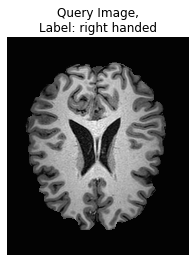

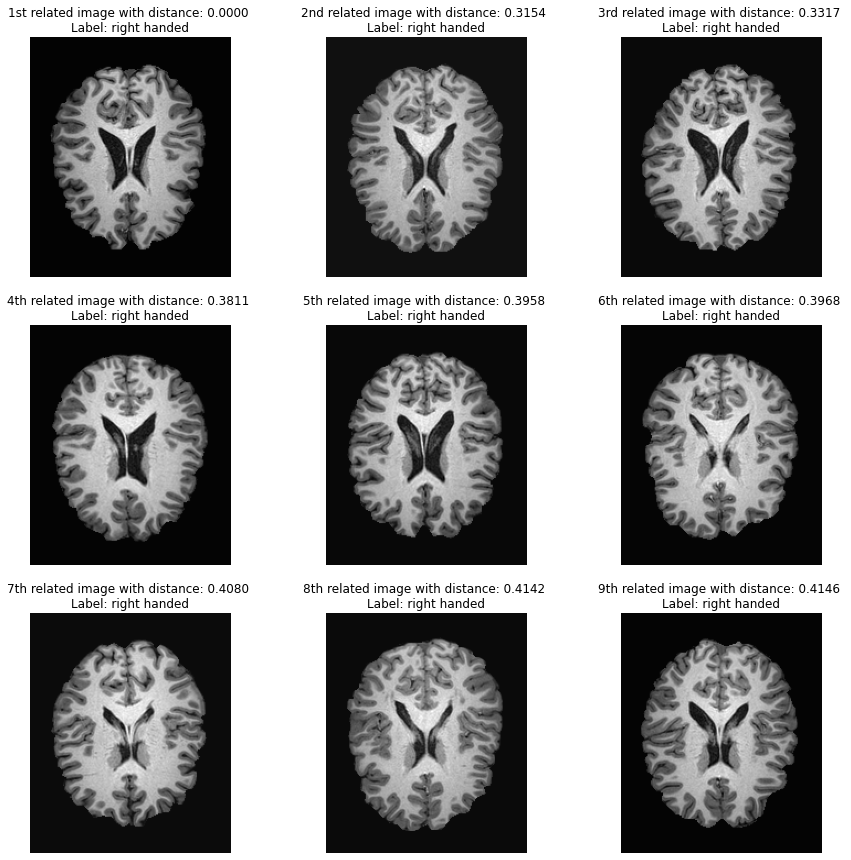

In [886]:
Queryim = im[2:3].to(device)
hasshs,_ = model16.extract_codes_and_logits(Queryim)
hashlist = []
for i in range(len(teF)+1):
    hashlist.append(torch.dist(hasshs.data.cpu(),teF16[i], 2))
res = getTop(df_PIOP1_test['handedness'], df_PIOP1_test['path'], hashlist) 
displayQ(df_PIOP1_test['path'][2], df_PIOP1_test['handedness'][2])
#displayQ(df_PIOP2_test['path'][15], df_PIOP2_test['handedness'][15])
display9Images(res)

In [929]:
Queryim = im[0:1].to(device)
hasshs,_ = model32.extract_codes_and_logits(Queryim)
print(hasshs)

tensor([[-0.2655, -0.1988, -0.1593,  0.4723,  0.4402, -0.7941,  0.9750, -0.1924,
         -0.4823,  0.4979,  0.2435,  0.8098,  0.0240, -0.1495,  0.6770,  0.6044,
         -0.5639,  0.8301,  0.1212, -0.7209, -0.2017, -0.0699, -0.2495, -0.5192,
         -0.4669, -0.0651,  0.0359,  0.7226, -0.2228,  0.5696,  0.1504, -0.4105]],
       device='cuda:0', grad_fn=<TanhBackward>)


torch.Size([128, 2])


(-0.5, 15.5, 15.5, -0.5)

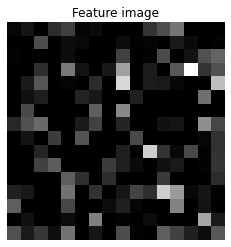

In [925]:
Feature = model32.feature_extractor(im[0:1].to(device))
Feature = torch.squeeze(Feature)
print(Feature.shape)
Feature = np.reshape(Feature.cpu().data.numpy(), (16,16)) 
import matplotlib.pyplot as plt
#im = nb.load(Feature)
#im = im.get_fdata()
plt.imshow(255*Feature, cmap = 'gray')
plt.title('Feature image')
plt.axis('off')

In [908]:
has_cython = True
#loss_test8,teF8, teY_pred8,labels8
train_hash8 = np.reshape([i.numpy() for i in trF8], (len(trF8), 8))
test_hash8 = np.reshape([i.numpy() for i in teF8], (len(teF8), 8))
train_label8 = np.reshape([i for i in tr_lab8], (len(tr_lab8), 1))
test_label8 = np.reshape([i for i in labels8], (len(labels8), 1))

train_hash16 = np.reshape([i.numpy() for i in trF16], (len(trF16), 16))
test_hash16 = np.reshape([i.numpy() for i in teF16], (len(teF16), 16))
train_label16 = np.reshape([i for i in tr_lab16], (len(tr_lab16), 1))
test_label16 = np.reshape([i for i in labels16], (len(labels16), 1))

train_hash24 = np.reshape([i.numpy() for i in trF24], (len(trF24), 24))
test_hash24 = np.reshape([i.numpy() for i in teF24], (len(teF24), 24))
train_label24 = np.reshape([i for i in tr_lab24], (len(tr_lab24), 1))
test_label24 = np.reshape([i for i in labels24], (len(labels24), 1))

train_hash32 = np.reshape([i.numpy() for i in trF32], (len(trF32), 32))
test_hash32 = np.reshape([i.numpy() for i in teF32], (len(teF32), 32))
train_label32 = np.reshape([i for i in tr_lab32], (len(tr_lab32), 1))
test_label32 = np.reshape([i for i in labels32], (len(labels32), 1))


In [504]:
#loss_tr, trF, trY_pred,tr_lab = test(trainloader, device, model, criterion)
#loss_tr16, trF16, trY_pred16,tr_lab16 = test(trainloader, device, model1, criterion)
#qB1 = np.reshape([i.numpy() for i in qB], (len(qB), 32))
#rB = np.reshape([i.numpy() for i in teF], (len(teF), 32))
#query_L1 = np.reshape([i for i in query_L], (len(qB), 1))
#retrieval_L = np.reshape([i for i in teY_pred], (len(teF), 1))
#df_recs = pd.DataFrame(query_L, columns = ['label'])
#df_truth = pd.DataFrame(Label_tr, columns = ['label'])
#recall(df_truth, df_recs)
#Label_tr = np.reshape([i for i in L], (len(L), 1))
#Label_tr

In [ ]:
loss_test_run2_8,teF_run2_8, teY_pred_run2_8,labels_run2_8 
loss_test_run2_16,teF_run2_16, teY_pred_run2_16,labels_run2_16 
loss_test_run2_24,teF_run2_24, teY_pred_run2_24,labels_run2_24 
loss_test_run2_32,teF_run2_32, teY_pred_run2_32,labels_run2_32

In [854]:
test_hash8 = np.reshape([i.numpy() for i in teF_run2_8], (len(teF_run2_8), 8))
test_label8 = np.reshape([i for i in labels_run2_8], (len(labels_run2_8), 1))
test_hash16 = np.reshape([i.numpy() for i in teF_run2_16], (len(teF_run2_16), 16))
test_label16 = np.reshape([i for i in labels_run2_16], (len(labels_run2_16), 1))
test_hash24 = np.reshape([i.numpy() for i in teF_run2_24], (len(teF_run2_24), 24))
test_label24 = np.reshape([i for i in labels_run2_24], (len(labels_run2_24), 1))
test_hash32 = np.reshape([i.numpy() for i in teF_run2_32], (len(teF_run2_32), 32))
test_label32 = np.reshape([i for i in labels_run2_32], (len(labels_run2_32), 1))

In [405]:
def calc_hamming_dist(b1, b2):
    """Compute the hamming distance between every pair of data points represented in each row of b1 and b2"""
    p1 = np.sign(b1).astype(np.int8)
    p2 = np.sign(b2).astype(np.int8)

    r = p1.shape[1]
    d = (r - np.matmul(p1, np.transpose(p2))) // 2
    return d

#@timer
def calc_hamming_rank(b1, b2, force_slow=False):
    """Return rank of pairs. Takes vector of hashes b1 and b2 and returns correspondence rank of b1 to b2
    """
    #print("Warning. Using slow \"calc_hamming_dist\"")
    dist_h = calc_hamming_dist(b2, b1)
    return np.argsort(dist_h, 1, kind='mergesort')

In [406]:
def compute_map(hashes_train, hashes_test, labels_train, labels_test, top_n=0, and_mode=False, force_slow=False,weighted_mode = False):
    """Compute MAP for given set of hashes and labels"""
    order = calc_hamming_rank(hashes_train, hashes_test)

    #print("Warning. Using slow \"compute_map\"")
    s = __compute_s(labels_train, labels_test, and_mode)
    return __calc_map(order, np.transpose(s), top_n)

#@timer
def __compute_s(train_l, test_l, and_mode):
    """Return similarity matrix between two label vectors
    The output is binary matrix of size n_train x n_test
    """
    if and_mode:
        return np.bitwise_and(train_l, np.transpose(test_l)).astype(dtype=np.bool)
    else:
        return np.equal(train_l, np.transpose(test_l))


#@timer
def __calc_map(order, s, top_n):
    """compute mean average precision (MAP)"""
    Q, N = s.shape
    if top_n == 0:
        top_n = N
    pos = np.asarray(range(1, top_n + 1), dtype=np.float32)
    map = 0
    av_precision = np.zeros(top_n)
    av_recall = np.zeros(top_n)
    for q in range(Q):
        total_number_of_relevant_documents = np.sum(s[q].astype(np.float32))
        relevance = s[q, order[q, :top_n]].astype(np.float32)
        cumulative = np.cumsum(relevance)
        number_of_relative_docs = cumulative[-1:]
        if number_of_relative_docs != 0:
            precision = cumulative / pos
            recall = cumulative / total_number_of_relevant_documents
            av_precision += precision
            av_recall += recall
            ap = np.dot(precision, relevance) / number_of_relative_docs
            map += ap
    map /= Q
    av_precision /= Q
    av_recall /= Q

    curve = np.zeros([top_n, 2])

    curve[:, 0] = av_precision #TopN precision
    curve[:, 1] = av_recall #Recall@N

    return float(map), curve

In [210]:
#order = calc_hamming_rank(rB, qB1)
#s = __compute_s(retrieval_L, query_L1, and_mode)
#compute_map(hashes_train, hashes_test, labels_train, labels_test, top_n=0, and_mode=False, force_slow=False,weighted_mode = False
map, curve = compute_map(train_hash16,test_hash16,train_label16,test_label16, top_n=10)

In [855]:
mAP8, curve8, mAP16, curve16, mAP24, curve24, mAP32, curve32 = [],[],[],[],[],[],[],[]
#topn = [0, 5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
topn = [0, 5,10,15,20,25,30]
for i in topn:
    #train_hash32, test_hash32, train_label32, test_label32
    mAP8.append(compute_map(train_hash8,test_hash8,train_label8,test_label8, top_n=i)[0])
    curve8.append(compute_map(train_hash8,test_hash8,train_label8,test_label8, top_n=i)[1])    
    mAP16.append(compute_map(train_hash16,test_hash16,train_label16,test_label16, top_n=i)[0])
    curve16.append(compute_map(train_hash16,test_hash16,train_label16,test_label16, top_n=i)[1])
    mAP24.append(compute_map(train_hash24,test_hash24,train_label24,test_label24, top_n=i)[0])
    curve24.append(compute_map(train_hash24,test_hash24,train_label24,test_label24, top_n=i)[1])    
    mAP32.append(compute_map(train_hash32,test_hash32,train_label32,test_label32, top_n=i)[0])
    curve32.append(compute_map(train_hash32,test_hash32,train_label32,test_label32, top_n=i)[1])

In [856]:
print('K:\tmAP: \n========================\n8:\t{}\n16:\t{}\n24:\t{}\n32:\t{}'
      .format(mAP8[0],mAP16[0],mAP24[0],mAP32[0]))

K:	mAP: 
8:	0.5016556978225708
16:	0.5551310181617737
24:	0.5156418085098267
32:	0.5642944574356079


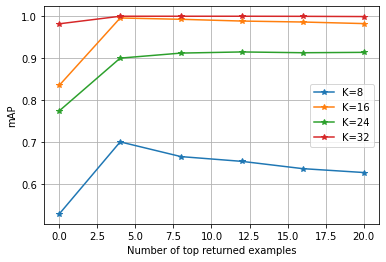

In [763]:
plt.plot(topn, mAP8, marker='*', label='K=8')
plt.plot(topn, mAP16, marker='*', label='K=16')
plt.plot(topn, mAP24, marker='*', label='K=24')
plt.plot(topn, mAP32, marker='*', label='K=32')

plt.xlabel('Number of top returned examples')
plt.ylabel('mAP')
plt.grid()
plt.legend()

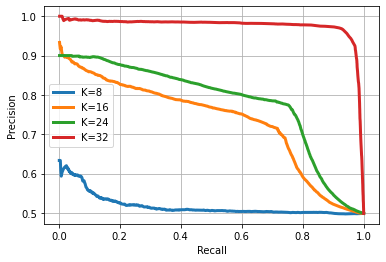

In [812]:
curve32[0]
from matplotlib import pyplot
pyplot.plot(curve8[0][:,1], curve8[0][:,0], label='K=8',linewidth=3.0)
pyplot.plot(curve16[0][:,1], curve16[0][:,0], label='K=16',linewidth=3.0)
pyplot.plot(curve24[0][:,1], curve24[0][:,0],  label='K=24',linewidth=3.0)
pyplot.plot(curve32[0][:,1], curve32[0][:,0], label='K=32',linewidth=3.0)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
pyplot.grid()
pyplot.show()

In [815]:
x = [i for i in range(len(curve8[6][:,0]))]

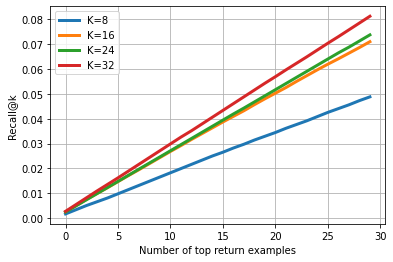

In [817]:
#, marker='+'
from matplotlib import pyplot
plt.plot(x, curve8[6][:,1], label='K=8',linewidth=3.0)

plt.plot(x, curve16[6][:,1], label='K=16',linewidth=3.0)
plt.plot(x, curve24[6][:,1], label='K=24',linewidth=3.0)
plt.plot(x, curve32[6][:,1], label='K=32',linewidth=3.0)

plt.xlabel('Number of top return examples')
plt.ylabel('Recall@k')
# show the legend
pyplot.legend()
pyplot.grid()
# show the plot
pyplot.show()


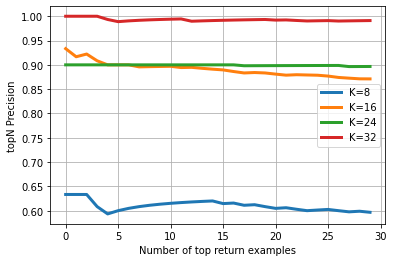

In [818]:
from matplotlib import pyplot
plt.plot(x, curve8[6][:,0], label='K=8',linewidth=3.0)
plt.plot(x, curve16[6][:,0],  label='K=16',linewidth=3.0)
plt.plot(x, curve24[6][:,0], label='K=24',linewidth=3.0)
plt.plot(x, curve32[6][:,0], label='K=32',linewidth=3.0)
plt.xlabel('Number of top return examples')
plt.ylabel('topN Precision')
# show the legend
pyplot.legend()
pyplot.grid()
# show the plot
pyplot.show()

In [ ]:
#PIOP1_Handedness_32Bit
#map(n=10) 0.6226862668991089
#map(n=20) 0.6480880379676819
#map(n=30) 0.6565698981285095
#map(n=40) 0.6681654453277588
#map(n=50) 0.6635098457336426
#map(n=55) 0.6481173634529114
#map(n=60) 0.6498551964759827